In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## ___Polynomial Regression___

Linear regression cannot predict targets if the relationship between features and targets is non linear  

Then how we predict non-linear relationships?  
We use linear regression to predict non-linear functions.  
- How? :  
We use "PolynomialFeatures" of sklearn to add new features in the original data(X).  
These features now we have are $x, x^2, x^3, x^4...$  
For multiple features (lets say x1, x2): $x_1,x_2,{x_1}^2,{x_2}^2,x_1x_2$    

Now  
Even though the model is linear in the coefficients, the new features are nonlinear functions of the original inputs.  


So, linear regression prediction becomes capable of modeling nonlinear relationships by fitting a straight line in a higher-dimensional (polynomial) feature space, which corresponds to a curved function in the original input space.

In [225]:
m = 100                          #number of samples
X = 6*np.random.rand(m,1) - 3    #Feature (range of X is from -3 to 3)
y = 10 + 3*X + X**2 + 3*np.random.rand(m,1)           #Polynomial function of X with some noise

In [226]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(
    degree=2,                         #Max degree of transformed data is 2, ex: x1,x2 are features then output have features x1,x2,x1**2,x**2,x1x2
    interaction_only=False,           #If True: only x1x2 type of terms are added
    include_bias=False,               #To add bias feature of 1s (generally false because linear reg handles it automatically)
)

X_poly = poly_feature.fit_transform(X)

In [227]:
X.shape, X_poly.shape

((100, 1), (100, 2))

In [228]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_poly,y)

LinearRegression()

In [229]:
regressor.intercept_,regressor.coef_

(array([11.47896684]), array([[2.99962653, 0.96386418]]))

These are almost the weights we have defined above for y!!  


In [230]:
y_predict = regressor.predict(X_poly)

In [231]:
y_predict[:5]

array([[25.19027462],
       [10.66979569],
       [ 9.84346292],
       [ 9.49751399],
       [12.47889827]])

In [232]:
y[:5]

array([[25.07904216],
       [10.65599221],
       [11.37533675],
       [ 9.43528705],
       [12.82082129]])

## Visualization

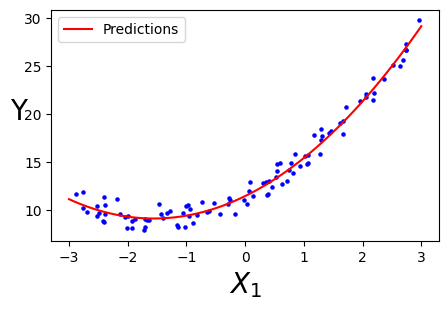

In [233]:
plt.figure(figsize=(5,3))
plt.xlabel("$X_1$",fontsize=20)
plt.ylabel("Y",rotation=0,fontsize = 20)
plt.scatter(X,y,s=5,c='b')

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_feature.transform(X_new)
y_new = regressor.predict(X_new_poly)
plt.plot(X_new,y_new,c="r",label='Predictions')
plt.legend()

- _Higher the degree of polynomial --> better the algorithm will fit the data_

In [234]:
poly_feature = PolynomialFeatures(
    degree=15,
    interaction_only=False,
    include_bias=False
)

X_high = poly_feature.fit_transform(X)
X_high.shape

regressor2 = LinearRegression()
regressor2.fit(X_high,y)

LinearRegression()

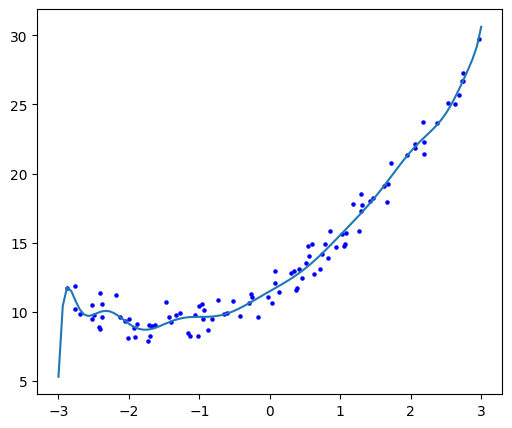

In [235]:
plt.figure(figsize=(6,5))


X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_feature.transform(X_new)
y_new = regressor2.predict(X_new_poly)

plt.scatter(X,y,s=5,c="b")
plt.plot(X_new,y_new)


This is an example of overfitted model  
This model of 15 degree polynomial may look good on train data but will fail on test data

## How to select perfect model
- ___Learning Curves___  :  
Plot graph of _Performance metric_ vs _Training set size_ of _Train data_ and _Test data_

In [236]:
## Creating pipeline of polynomial regression
from sklearn.pipeline import Pipeline
poly_pipeline = Pipeline([
    ("poly_feature",PolynomialFeatures(degree=1)),#degree=1 i.e linear regression(underfit model)
    ("regressor",LinearRegression())
])


In [237]:
## Learning curve 

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
def learning_curve(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)

    train_error,val_error = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        X_train_predict = model.predict(X_train[:m])
        X_val_predict = model.predict(X_val)

        train_error.append(root_mean_squared_error(y_train[:m],X_train_predict))
        val_error.append(root_mean_squared_error(y_val,X_val_predict))

    plt.plot(train_error,"r-+",label="Training")
    plt.plot(val_error,"b-",label="Validation")
    plt.xlabel("Training set size")
    plt.ylabel("RSME")
    plt.legend()



(np.float64(-1.0), np.float64(80.0), np.float64(0.0), np.float64(4.0))

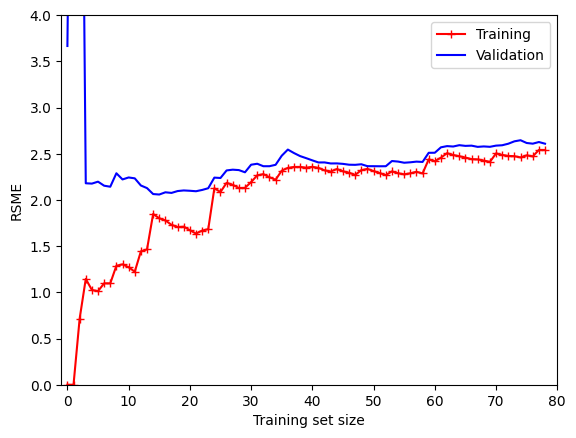

In [238]:
learning_curve(poly_pipeline,X,y)
plt.axis([-1,80,0,4])              #limit plot to this range

With low training data --> low error on training set & high error on validation set  
As training size increases model learns and RSME of val-set decrease 

This is underfit model

In [250]:
poly_pipeline = Pipeline([
    ("poly_feature",PolynomialFeatures(degree=15)),#degree=1 i.e linear regression(underfit model)
    ("regressor",LinearRegression())
])


(np.float64(-1.0), np.float64(80.0), np.float64(0.0), np.float64(4.0))

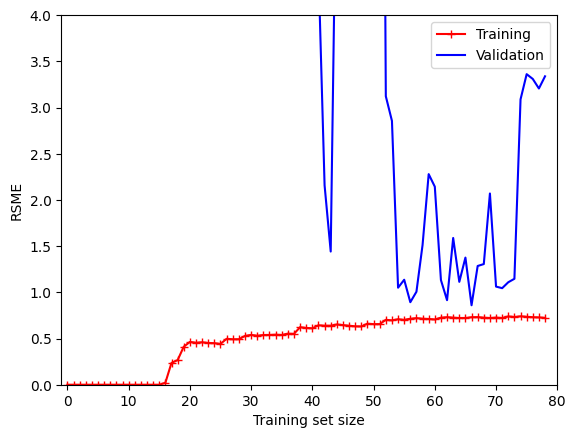

In [251]:
learning_curve(poly_pipeline,X,y)
plt.axis([-1,80,0,4])  